# Capstone-Project -The Battle of Neighborhoods in Dubai

by Susan Sam

## 1.	Introduction

**1.1 Background**

Dubai is the most populous city in the United Arab Emirates (UAE). Located in the eastern part of the Arabian Peninsula on the coast of the Persian Gulf, Dubai aims to be the business hub of Western Asia. It is also a major global transport hub for passengers and cargo. Oil revenue helped accelerate the development of the city, which was already a major mercantile hub. 

A center for regional and international trade since the early 20th century, Dubai's economy relies on revenues from trade, tourism, aviation, real estate, and financial services. 
According to government data, the population of Dubai is estimated at around 3.39 million as of January 2020. 

Dubai being the central hub for trade and host for upcoming Expo 2020 trade exhibition, the need for affordable residential community with easy access to shopping, restaurants, schools and hospitals is vital.

**1.2 Business Problem**

This project aims to locate the community where affordable residential locations are available in the city of Dubai with the following criteria:
a.	Residential type- Apartments
b.	Rental cap less than 40000 AED per annum.
c.	Neighborhood- Restaurants, Supermarkets
d.	Transportation- Bus stops
e.	Sporting Facilities- Playgrounds/Courts/Jogger Tracks/Gym


**1.3	Targeted Audience**

This project will benefit anyone who plans to move to Dubai and looking for a low cost apartment. It will help people to take smart and efficient decision on selecting a best residential area. 

## 2. Data

**2.1 Accessing the Data**


In [2]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c anaconda lxml --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    libxml2-2.9.10             |       he19cac6_1         1.3 MB  anaconda
    libxslt-1.1.34             |       hc22bd24_0         573 KB  anaconda
    lxml-4.5.2                 |   py36hefd8a0e_0         1.4 MB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:   

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np # library to handle data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [4]:
!pip install beautifulsoup4 # Beautiful Soup
from bs4 import BeautifulSoup
import requests

import folium # map rendering libr
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 

     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01


In [5]:
filename = "https://www.propertymonitor.ae/research/uae-communities-index/dubai-rental-index.html"
df = pd.read_html(filename,flavor='html5lib',index_col=0)

**Know the Data**

In [6]:
dfHousing=pd.DataFrame(df[0])
type(dfHousing)
dfHousing

,CommunityType,Median Rent(AED/unit),Lastmonth
Community,,,
Al Furjan,Apartment,72305,-3.58%
Al Furjan,Villa,133200,-1.37%
Al Habtoor City,Apartment,92193,-5.31%
Al Khail Heights,Apartment,42456,-1.52%
Arabian Ranches,Villa,104885,-0.35%
Arabian Ranches 2,Villa,132561,-0.40%
Barsha Heights (Tecom),Apartment,70543,-0.62%
Business Bay,Apartment,85302,-1.79%
City Walk,Apartment,146510,-0.21%


**2.2 Data Wrangling**

As the 'lastmonth' column is not useful to us in solving this problem, we will delete that column.

In [7]:
dfHousing.drop('Lastmonth',axis=1,inplace=True)
dfHousing.head()

,CommunityType,Median Rent(AED/unit)
Community,,
Al Furjan,Apartment,72305
Al Furjan,Villa,133200
Al Habtoor City,Apartment,92193
Al Khail Heights,Apartment,42456
Arabian Ranches,Villa,104885


In [8]:
dfHousing.shape

(57, 2)

## 3 Data Analysis

**3.1 Analysing the master data**

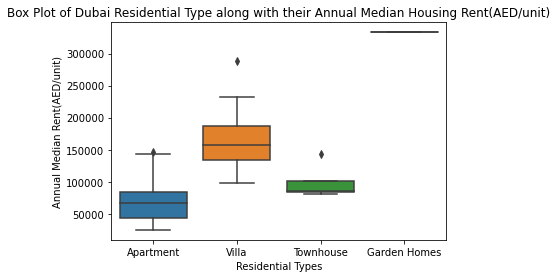

In [9]:
sns.boxplot(x="CommunityType", y="Median Rent(AED/unit)", data=dfHousing)
plt.xlabel('Residential Types')
plt.ylabel('Annual Median Rent(AED/unit)')
plt.title('Box Plot of Dubai Residential Type along with their Annual Median Housing Rent(AED/unit)')
plt.show()

From the above boxplot, it is clear that apartment type houses are the lowcost residential types in Dubai.
So we will seperate out the Apartment data from the dataframe.

In [10]:
dfHouse= dfHousing.groupby('CommunityType')
dfApartment=dfHouse.get_group('Apartment')
dfApartment

,CommunityType,Median Rent(AED/unit)
Community,,
Al Furjan,Apartment,72305
Al Habtoor City,Apartment,92193
Al Khail Heights,Apartment,42456
Barsha Heights (Tecom),Apartment,70543
Business Bay,Apartment,85302
City Walk,Apartment,146510
Culture Village,Apartment,82038
Damac Hills (Akoya By Damac),Apartment,66501
Discovery Gardens,Apartment,32457


**Statistical Analysis**

In [11]:
dfApartment.describe()

,Median Rent(AED/unit)
count,35.000000
mean,69304.171429
std,32042.878438
min,24843.000000
25%,42668.000000
50%,66501.000000
75%,84201.500000
max,146510.000000


**Bar Plot**

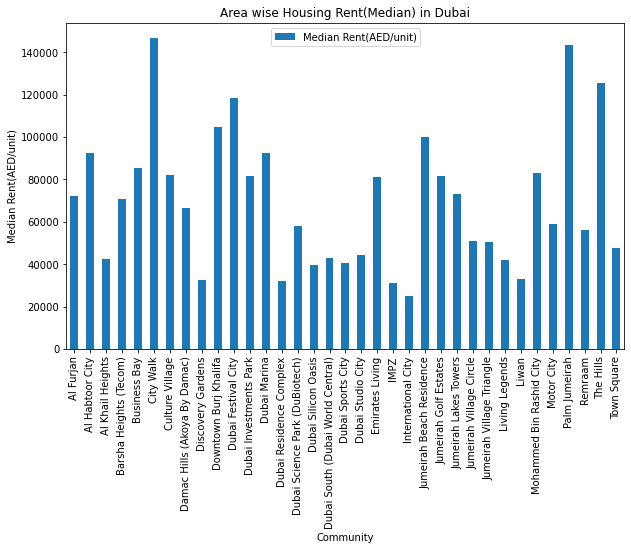

In [12]:
dfApartment.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Community') # add to x-label to the plot
plt.ylabel('Median Rent(AED/unit)') # add y-label to the plot
plt.title('Area wise Housing Rent(Median) in Dubai') # add title to the plot

plt.show()

As we need to look for lowcost apartments with price less than 40000, we will seperate the data which satisfies the criteria.

In [77]:
dflowcost = pd.DataFrame(dfApartment[dfApartment['Median Rent(AED/unit)']<40000])
dflowcost

,CommunityType,Median Rent(AED/unit)
Community,,
Discovery Gardens,Apartment,32457
Dubai Residence Complex,Apartment,31853
Dubai Silicon Oasis,Apartment,39525
IMPZ,Apartment,30972
International City,Apartment,24843
Liwan,Apartment,33035


In [78]:
# As the data contains only data for "Apartment", we will delete the column 'Community Type'
dflowcost.drop('CommunityType', axis=1, inplace=True)
dflowcost

,Median Rent(AED/unit)
Community,
Discovery Gardens,32457
Dubai Residence Complex,31853
Dubai Silicon Oasis,39525
IMPZ,30972
International City,24843
Liwan,33035


**Finding the latitudes and longitudes using Geocoder class**

In [79]:
## Adding the details in the address values
address=dflowcost.index
address=address + ", Dubai"
address

Index(['Discovery Gardens, Dubai', 'Dubai Residence Complex, Dubai',
       'Dubai Silicon Oasis, Dubai', 'IMPZ, Dubai',
       'International City, Dubai', 'Liwan, Dubai'],
      dtype='object', name='Community')

In [80]:
geolocator = Nominatim(user_agent="myGeocoder")
latitude=[]
longitude=[]

for i,name in enumerate(address) :
    if name=='IMPZ, Dubai': name="Dubai Production City, Dubai"
    location = geolocator.geocode(name)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
print("All latitudes and longitudes collected")
dflowcost.loc[:,'Latitude']= latitude
dflowcost.loc[:,'Longitude']= longitude
dflowcost

All latitudes and longitudes collected


,Median Rent(AED/unit),Latitude,Longitude
Community,,,
Discovery Gardens,32457,25.033867,55.151891
Dubai Residence Complex,31853,25.093545,55.379748
Dubai Silicon Oasis,39525,25.122194,55.385433
IMPZ,30972,25.031797,55.191002
International City,24843,25.166041,55.407730
Liwan,33035,25.110121,55.367699


**Superimposing these locations in Dubai Map using Folium**

In [17]:
## We will show markers in the list areas of dubai
latitude=25.2048
longitude= 55.2708
Dubai_map = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
area = folium.map.FeatureGroup()

# loop through the community areas and add each to the area feature group
for lat, lng, in zip(dflowcost.Latitude, dflowcost.Longitude):
    area.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(dflowcost.Latitude)
longitudes = list(dflowcost.Longitude)
labels = list(dflowcost.index)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Dubai_map)    
    
# add area to map
Dubai_map.add_child(area)

**3.2 Detailed study of shortlisted community areas**

From the above Map, its clear that Dubai Residence Complex, Dubai Silicon oasis and Liwan are nearby. So we will explore only one sample Residential community from this area.

**i. Discovery Gardens**

In [18]:
## Now we will use the Four square data to explore these locations.
VERSION = '20180604'
LIMIT = 30
radius=1000
# First We will explore Discovery Gardens
latitude=dflowcost.loc['Discovery Gardens','Latitude' ]
longitude=dflowcost.loc['Discovery Gardens','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.033867100000002,55.151891498139236&v=20180604&radius=1000&limit=30'

In [19]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [20]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet
0,e-0-51a8398f498e03d3275d8fbe-0,0,"[{'summary': 'This spot is popular', 'type': '...",51a8398f498e03d3275d8fbe,Discovery Gardens Pool #11,Discovery Gardens,25.029738,55.154788,"[{'label': 'display', 'lat': 25.02973803915468...",544,AE,Discovery Gardens,دبي,دبي,الإمارات العربية المتحدة,"[Discovery Gardens, دبي, الإمارات العربية المت...","[{'id': '4bf58dd8d48988d15e941735', 'name': 'P...",0,[],NaN
1,e-0-52d00fb3498ed362c508cf74-1,0,"[{'summary': 'This spot is popular', 'type': '...",52d00fb3498ed362c508cf74,Discovery Pavilions,7th St,25.035228,55.146861,"[{'label': 'display', 'lat': 25.03522815202505...",529,AE,Discovery Gardens,دبي,دبي,الإمارات العربية المتحدة,"[7th St, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],NaN
2,e-0-58539ecf0a3d541975a39b69-2,0,"[{'summary': 'This spot is popular', 'type': '...",58539ecf0a3d541975a39b69,Spinneys,Al Furjan Pavilion,25.025144,55.152601,"[{'label': 'display', 'lat': 25.02514383375121...",973,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Al Furjan Pavilion, دبي, الإمارات العربية الم...","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",0,[],NaN
3,e-0-586917f00037eb49445df020-3,0,"[{'summary': 'This spot is popular', 'type': '...",586917f00037eb49445df020,Al Furjan Pavilion,Al-Furjan,25.025050,55.152890,"[{'label': 'display', 'lat': 25.02505, 'lng': ...",986,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Al-Furjan, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],NaN
4,e-0-59c7c86b2bf9a9165f0479c9-4,0,"[{'summary': 'This spot is popular', 'type': '...",59c7c86b2bf9a9165f0479c9,Carrefour Market,7th St,25.034831,55.147098,"[{'label': 'display', 'lat': 25.03483131364094...",495,AE,Discovery Gardens,دبي,دبي,الإمارات العربية المتحدة,"[7th St, دبي, الإمارات العربية المتحدة]","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",0,[],NaN


In [21]:
print("This list has ", dataframe.shape[0], "venues")
dataframe['venue.name']

This list has  26 venues


0         Discovery Gardens Pool #11
1                Discovery Pavilions
2                           Spinneys
3                 Al Furjan Pavilion
4                   Carrefour Market
5                            Oregano
6      Jawharet Beirut (جوهرة بيروت)
7       Discovery Gardens playground
8                      West Zone Zen
9     Tennis Court Discovery Gardens
10                              Pool
11             mikoy's italian pizza
12      Discovery Garden Court No. 8
13       Discovery Garden Bus Stop 6
14                      Costa Coffee
15                     Arabian Grill
16                     Texas Chicken
17                 Bin Sina Pharmacy
18                      Gloria Jeans
19                     Papa Murphy's
20                      All Stir Fry
21                            Pronto
22                           POPEYES
23                    The GlassHouse
24                    Al Furjan Club
25                     Life Pharmacy
Name: venue.name, dtype: object

Creating function for seggregrating the necessary data

In [22]:
def getvenues(venues,dfneighbourhood) :
    venuecat=[]
    i=0
    while i<len(venues) :
        venuecat.append(venues[i]['venue']['categories'][0]['name'])
        i=i+1

    venue=dfneighbourhood['venue.name']
    lat=dfneighbourhood['venue.location.lat']
    lng=dfneighbourhood['venue.location.lng']
    dist = dfneighbourhood['venue.location.distance']
    dfvenue=pd.DataFrame(venue)
    dfvenue.loc[:,'Venue']=lat
    dfvenue.loc[:,'lat']=lat
    dfvenue.loc[:,'lng']=lng
    dfvenue.loc[:,'category']=venuecat
    dfvenue.loc[:,'distance']=dist
    return(dfvenue)
dfdiscovery=getvenues(results, dataframe)
dfdiscovery

,venue.name,Venue,lat,lng,category,distance
0,Discovery Gardens Pool #11,25.029738,25.029738,55.154788,Pool,544
1,Discovery Pavilions,25.035228,25.035228,55.146861,Shopping Mall,529
2,Spinneys,25.025144,25.025144,55.152601,Supermarket,973
3,Al Furjan Pavilion,25.025050,25.025050,55.152890,Shopping Mall,986
4,Carrefour Market,25.034831,25.034831,55.147098,Supermarket,495
5,Oregano,25.025471,25.025471,55.152869,Italian Restaurant,939
6,Jawharet Beirut (جوهرة بيروت),25.035331,25.035331,55.146815,Middle Eastern Restaurant,537
7,Discovery Gardens playground,25.033740,25.033740,55.151289,Park,62
8,West Zone Zen,25.034954,25.034954,55.151605,Convenience Store,124
9,Tennis Court Discovery Gardens,25.035703,25.035703,55.151426,Tennis Court,209


From the table shown above, it is clear that supermarket, restaurants, gym and coffee shops are there in the vicinities. We will analyse the data.

In [23]:
print("There are ", len(dfdiscovery['category'].unique()),' unique venue categories listed for Discovery Gardens')

There are  18  unique venue categories listed for Discovery Gardens


In [24]:
dfcat1=dfdiscovery['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat1

,unique_values,counts
0,Pharmacy,2
1,Fried Chicken Joint,2
2,Pool,2
3,Shopping Mall,2
4,Supermarket,2
5,Middle Eastern Restaurant,2
6,Pizza Place,2
7,Café,2
8,Basketball Court,1
9,Gym / Fitness Center,1


In [89]:
## As the category has different different types of restaurants and Gyms, we will regroup the data.
def del_duplicate(dfdup) :
    val=[]
    for i in range(len(dfdup)) :
        if ('Restaurant' in dfdup.iloc[i,4]) or ('Pizza' in dfdup.iloc[i,4]) or (
        'Chicken' in dfdup.iloc[i,4]) or ('BBQ' in dfdup.iloc[i,4] ) or (
        'Sandwich' in dfdup.iloc[i,4] ) or ('Burger' in dfdup.iloc[i,4]) or (
        'Fish' in dfdup.iloc[i,4] or 'Diner' in dfdup.iloc[i,4]) : 
            val.append('Restaurant')
        elif ('Gym' in dfdup.iloc[i,4]) :
            val.append('Gym')
        elif ('Coffee Shop' in dfdup.iloc[i,4]) or ('Hookah Bar' in dfdup.iloc[i,4]) :
            val.append('Café')
        elif ('Big Box' in dfdup.iloc[i,4])  :
            val.append('Supermarket')    
        else :
            val.append(dfdup.iloc[i,4])
    dfdup.loc[:,'categorytype']= val
    return dfdup

del_duplicate(dfdiscovery)
dfdiscovery

,venue.name,Venue,lat,lng,category,distance,categorytype
0,Discovery Gardens Pool #11,25.029738,25.029738,55.154788,Pool,544,Pool
1,Discovery Pavilions,25.035228,25.035228,55.146861,Shopping Mall,529,Shopping Mall
2,Spinneys,25.025144,25.025144,55.152601,Supermarket,973,Supermarket
3,Al Furjan Pavilion,25.025050,25.025050,55.152890,Shopping Mall,986,Shopping Mall
4,Carrefour Market,25.034831,25.034831,55.147098,Supermarket,495,Supermarket
5,Oregano,25.025471,25.025471,55.152869,Italian Restaurant,939,Restaurant
6,Jawharet Beirut (جوهرة بيروت),25.035331,25.035331,55.146815,Middle Eastern Restaurant,537,Restaurant
7,Discovery Gardens playground,25.033740,25.033740,55.151289,Park,62,Park
8,West Zone Zen,25.034954,25.034954,55.151605,Convenience Store,124,Convenience Store
9,Tennis Court Discovery Gardens,25.035703,25.035703,55.151426,Tennis Court,209,Tennis Court


In [26]:
dfcat1=dfdiscovery['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat1

,unique_values,counts
0,Restaurant,9
1,Café,3
2,Pool,2
3,Supermarket,2
4,Shopping Mall,2
5,Pharmacy,2
6,Gym,1
7,Bus Station,1
8,Park,1
9,Basketball Court,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of Discovery Gardens, Dubai')

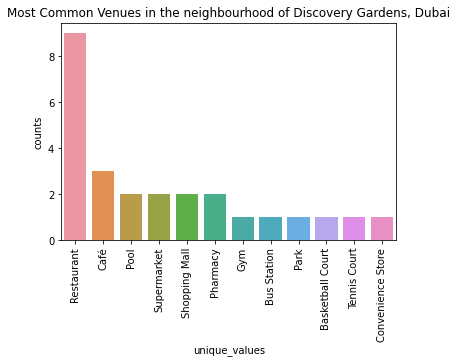

In [27]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat1)

barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of Discovery Gardens, Dubai') # add title to the plot

**One Hot Encoding**

In [28]:
# one hot encoding
gardens_onehot = pd.get_dummies(dfdiscovery[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gardens_onehot['Community'] = 'Discovery Gardens' 

# move neighborhood column to the first column
fixed_columns = [gardens_onehot.columns[-1]] + list(gardens_onehot.columns[:-1])
gardens_onehot = gardens_onehot[fixed_columns]

gardens_onehot.head()

,Community,Basketball Court,Bus Station,Café,Convenience Store,Gym,Park,Pharmacy,Pool,Restaurant,Shopping Mall,Supermarket,Tennis Court
0,Discovery Gardens,0,0,0,0,0,0,0,1,0,0,0,0
1,Discovery Gardens,0,0,0,0,0,0,0,0,0,1,0,0
2,Discovery Gardens,0,0,0,0,0,0,0,0,0,0,1,0
3,Discovery Gardens,0,0,0,0,0,0,0,0,0,1,0,0
4,Discovery Gardens,0,0,0,0,0,0,0,0,0,0,1,0


**ii. Dubai Silicon Oasis**

In [29]:
# Now We will explore Dubai Silicon Oasis
latitude=dflowcost.loc['Dubai Silicon Oasis','Latitude' ]
longitude=dflowcost.loc['Dubai Silicon Oasis','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.1221942,55.385432961279726&v=20180604&radius=1000&limit=30'

In [30]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [31]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-5402047b498ed19800e28399-0,0,"[{'summary': 'This spot is popular', 'type': '...",5402047b498ed19800e28399,Fit GYM,25.117833,55.391169,"[{'label': 'display', 'lat': 25.11783304859363...",754,AE,دبي,دبي,الإمارات العربية المتحدة,"[دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-4bc359602a89ef3b99e2f488-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bc359602a89ef3b99e2f488,Costa Coffee,25.114186,55.380913,"[{'label': 'display', 'lat': 25.11418621339317...",1001,AE,دبي,دبي,الإمارات العربية المتحدة,"[Dubai Silicon Oasis, دبي, الإمارات العربية ال...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],Dubai Silicon Oasis,NaN,NaN,NaN,NaN
2,e-0-53e1d13e498edbea25b880f7-2,0,"[{'summary': 'This spot is popular', 'type': '...",53e1d13e498edbea25b880f7,Cha Cha Chai,25.118870,55.394239,"[{'label': 'display', 'lat': 25.11886973453240...",961,AE,دبي,دبي,الإمارات العربية المتحدة,"[Danube BUILding (Dubai Silicon. Oasis), دبي, ...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Danube BUILding,Dubai Silicon. Oasis,NaN,NaN,NaN
3,e-0-5378cb0811d201915aef2afd-3,0,"[{'summary': 'This spot is popular', 'type': '...",5378cb0811d201915aef2afd,Puranmal,25.117638,55.390995,"[{'label': 'display', 'lat': 25.11763777565844...",756,AE,دبي,دبي,الإمارات العربية المتحدة,"[SIT TOWER (Silicon Oasis), دبي, الإمارات العر...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],SIT TOWER,Silicon Oasis,NaN,NaN,NaN
4,e-0-534e703a498e06e98feb1d76-4,0,"[{'summary': 'This spot is popular', 'type': '...",534e703a498e06e98feb1d76,The Snack House,25.118019,55.390942,"[{'label': 'display', 'lat': 25.11801883387304...",724,AE,دبي,دبي,الإمارات العربية المتحدة,"[Silicon Gate Building (Dubai Silicon Oasis), ...","[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",0,[],Silicon Gate Building,Dubai Silicon Oasis,NaN,NaN,NaN


In [32]:
print(dataframe.shape[0],"venues are returned by Foursquare")
dataframe['venue.name']

22 venues are returned by Foursquare


0                              Fit GYM
1                         Costa Coffee
2                         Cha Cha Chai
3                             Puranmal
4                      The Snack House
5                         Burger World
6                       The Kebab shop
7                    Tomato & Basilico
8                               Subway
9                             Tichinos
10                        Costa Coffee
11                      Baskin-Robbins
12                          La Brioche
13                     Sakura Nail Spa
14                          Choithrams
15    Doner Kebab (German Doner Kebab)
16             Chapter One Floral Cafe
17                  Al Ansari Exchange
18                 Oasis High Park Gym
19          Cafe & Ristorante Nicola‘s
20                    Russo's Pizzeria
21              Binghatti Diamonds Gym
Name: venue.name, dtype: object

In [33]:
dfsilicon=getvenues(results,dataframe)
dfsilicon

,venue.name,Venue,lat,lng,category,distance
0,Fit GYM,25.117833,25.117833,55.391169,Gym,754
1,Costa Coffee,25.114186,25.114186,55.380913,Coffee Shop,1001
2,Cha Cha Chai,25.118870,25.118870,55.394239,Café,961
3,Puranmal,25.117638,25.117638,55.390995,Indian Restaurant,756
4,The Snack House,25.118019,25.118019,55.390942,Comfort Food Restaurant,724
5,Burger World,25.117354,25.117354,55.390383,Burger Joint,734
6,The Kebab shop,25.117633,25.117633,55.390183,BBQ Joint,697
7,Tomato & Basilico,25.114933,25.114933,55.389806,Italian Restaurant,920
8,Subway,25.124616,25.124616,55.380732,Sandwich Place,545
9,Tichinos,25.124793,25.124793,55.381339,Italian Restaurant,503


In [34]:
print("There are ", len(dfsilicon['category'].unique()),' unique venue categories')

There are  14  unique venue categories


In [35]:
dfcat2=dfsilicon['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat2

,unique_values,counts
0,Italian Restaurant,4
1,Coffee Shop,3
2,Gym,3
3,Café,2
4,Currency Exchange,1
5,Convenience Store,1
6,Sandwich Place,1
7,Burger Joint,1
8,Turkish Restaurant,1
9,BBQ Joint,1


In [36]:
## Removing the duplicates and regrouping the data.
del_duplicate(dfsilicon)
dfsilicon

,venue.name,Venue,lat,lng,category,distance,categorytype
0,Fit GYM,25.117833,25.117833,55.391169,Gym,754,Gym
1,Costa Coffee,25.114186,25.114186,55.380913,Coffee Shop,1001,Café
2,Cha Cha Chai,25.118870,25.118870,55.394239,Café,961,Café
3,Puranmal,25.117638,25.117638,55.390995,Indian Restaurant,756,Restaurant
4,The Snack House,25.118019,25.118019,55.390942,Comfort Food Restaurant,724,Restaurant
5,Burger World,25.117354,25.117354,55.390383,Burger Joint,734,Restaurant
6,The Kebab shop,25.117633,25.117633,55.390183,BBQ Joint,697,Restaurant
7,Tomato & Basilico,25.114933,25.114933,55.389806,Italian Restaurant,920,Restaurant
8,Subway,25.124616,25.124616,55.380732,Sandwich Place,545,Restaurant
9,Tichinos,25.124793,25.124793,55.381339,Italian Restaurant,503,Restaurant


In [166]:
dfcat2=dfsilicon['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat2

,unique_values,counts
0,Restaurant,10
1,Café,5
2,Gym,3
3,Currency Exchange,1
4,Nail Salon,1
5,Ice Cream Shop,1
6,Convenience Store,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of Silicon Oasis, Dubai')

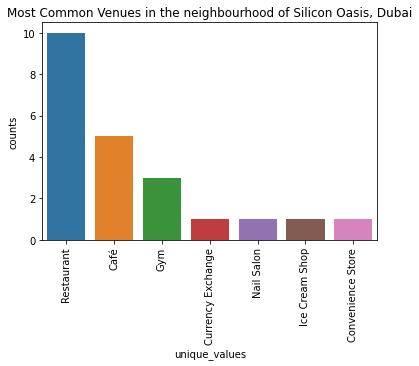

In [167]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat2)

barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of Silicon Oasis, Dubai') # add title to the plot

In [39]:
# one hot encoding
silicon_onehot = pd.get_dummies(dfsilicon[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
silicon_onehot['Community'] = 'Dubai Silicon Oasis' 

# move neighborhood column to the first column
fixed_columns = [silicon_onehot.columns[-1]] + list(silicon_onehot.columns[:-1])
silicon_onehot = silicon_onehot[fixed_columns]

silicon_onehot.head()

,Community,Café,Convenience Store,Currency Exchange,Gym,Ice Cream Shop,Nail Salon,Restaurant
0,Dubai Silicon Oasis,0,0,0,1,0,0,0
1,Dubai Silicon Oasis,1,0,0,0,0,0,0
2,Dubai Silicon Oasis,1,0,0,0,0,0,0
3,Dubai Silicon Oasis,0,0,0,0,0,0,1
4,Dubai Silicon Oasis,0,0,0,0,0,0,1


**iii. IMPZ (also known as Dubai Production City)**

In [40]:
##Now we will explore IMPZ/Dubai Production City
latitude=dflowcost.loc['IMPZ','Latitude' ]
longitude=dflowcost.loc['IMPZ','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.0317966,55.1910020580066&v=20180604&radius=1000&limit=30'

In [41]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [42]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet
0,e-0-5a8f57e6dee7700ea18a9718-0,0,"[{'summary': 'This spot is popular', 'type': '...",5a8f57e6dee7700ea18a9718,"Aloft Me'aisam, Dubai",Dubai Production City,25.037870,55.197183,"[{'label': 'display', 'lat': 25.0378696, 'lng'...",919,AE,دبي,دبي,الإمارات العربية المتحدة,"[Dubai Production City, دبي, الإمارات العربية ...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN
1,e-0-5051d0cae4b0e2b08b061c68-1,0,"[{'summary': 'This spot is popular', 'type': '...",5051d0cae4b0e2b08b061c68,McDonald's,ENOC,25.038489,55.185745,"[{'label': 'display', 'lat': 25.03848854342069...",914,AE,دبي,دبي,الإمارات العربية المتحدة,"[ENOC (Al Barsha South), دبي, الإمارات العربية...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],Al Barsha South
2,e-0-4e71cc9cfa76b23d3197d367-2,0,"[{'summary': 'This spot is popular', 'type': '...",4e71cc9cfa76b23d3197d367,Big Wok,IMPZ,25.028309,55.186833,"[{'label': 'display', 'lat': 25.02830909914578...",572,AE,دبي,دبي,الإمارات العربية المتحدة,"[IMPZ (Circular Building), دبي, الإمارات العرب...","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],Circular Building
3,e-0-50df069de4b0b76a2599b22a-3,0,"[{'summary': 'This spot is popular', 'type': '...",50df069de4b0b76a2599b22a,Texas Chicken,NaN,25.038361,55.185555,"[{'label': 'display', 'lat': 25.03836125886447...",914,AE,NaN,NaN,الإمارات العربية المتحدة,[الإمارات العربية المتحدة],"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN
4,e-0-5a8f57e5054e293da29570a7-4,0,"[{'summary': 'This spot is popular', 'type': '...",5a8f57e5054e293da29570a7,"Element Me'aisam, Dubai",Dubai Production City,25.037210,55.197006,"[{'label': 'display', 'lat': 25.03720964114265...",854,AE,دبي,دبي,الإمارات العربية المتحدة,"[Dubai Production City, دبي, الإمارات العربية ...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN


In [43]:
print(dataframe.shape[0],"venues are returned by Foursquare")
dataframe['venue.name']

11 venues are returned by Foursquare


0       Aloft Me'aisam, Dubai
1                  McDonald's
2                     Big Wok
3               Texas Chicken
4     Element Me'aisam, Dubai
5                Wadi Express
6                   Pizza Hut
7                    Puranmal
8              Baskin-Robbins
9                        Zoom
10           Occidental Hotel
Name: venue.name, dtype: object

In [44]:
dfimpz=getvenues(results,dataframe)
dfimpz

,venue.name,Venue,lat,lng,category,distance
0,"Aloft Me'aisam, Dubai",25.037870,25.037870,55.197183,Hotel,919
1,McDonald's,25.038489,25.038489,55.185745,Fast Food Restaurant,914
2,Big Wok,25.028309,25.028309,55.186833,Asian Restaurant,572
3,Texas Chicken,25.038361,25.038361,55.185555,Fast Food Restaurant,914
4,"Element Me'aisam, Dubai",25.037210,25.037210,55.197006,Hotel,854
5,Wadi Express,25.038198,25.038198,55.185917,Lebanese Restaurant,878
6,Pizza Hut,25.038301,25.038301,55.185830,Pizza Place,892
7,Puranmal,25.038254,25.038254,55.185739,Indian Restaurant,893
8,Baskin-Robbins,25.038166,25.038166,55.185482,Ice Cream Shop,901
9,Zoom,25.038301,25.038301,55.185448,Convenience Store,915


In [45]:
print("There are ", len(dfimpz['category'].unique()),' unique venue categories')

There are  8  unique venue categories


In [46]:
dfcat3=dfimpz['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat3

,unique_values,counts
0,Hotel,3
1,Fast Food Restaurant,2
2,Convenience Store,1
3,Lebanese Restaurant,1
4,Ice Cream Shop,1
5,Asian Restaurant,1
6,Pizza Place,1
7,Indian Restaurant,1


In [47]:
## As the category has different types of restaurants and Gyms, we will regroup the data.
del_duplicate(dfimpz)
dfimpz

,venue.name,Venue,lat,lng,category,distance,categorytype
0,"Aloft Me'aisam, Dubai",25.037870,25.037870,55.197183,Hotel,919,Hotel
1,McDonald's,25.038489,25.038489,55.185745,Fast Food Restaurant,914,Restaurant
2,Big Wok,25.028309,25.028309,55.186833,Asian Restaurant,572,Restaurant
3,Texas Chicken,25.038361,25.038361,55.185555,Fast Food Restaurant,914,Restaurant
4,"Element Me'aisam, Dubai",25.037210,25.037210,55.197006,Hotel,854,Hotel
5,Wadi Express,25.038198,25.038198,55.185917,Lebanese Restaurant,878,Restaurant
6,Pizza Hut,25.038301,25.038301,55.185830,Pizza Place,892,Restaurant
7,Puranmal,25.038254,25.038254,55.185739,Indian Restaurant,893,Restaurant
8,Baskin-Robbins,25.038166,25.038166,55.185482,Ice Cream Shop,901,Ice Cream Shop
9,Zoom,25.038301,25.038301,55.185448,Convenience Store,915,Convenience Store


In [168]:
dfcat3=dfimpz['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat3

,unique_values,counts
0,Restaurant,6
1,Hotel,3
2,Ice Cream Shop,1
3,Convenience Store,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of Dubai Production City')

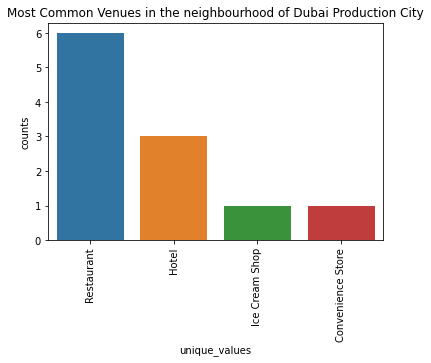

In [169]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat3)
barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of Dubai Production City') # add title to the plot

In [50]:
# one hot encoding
impz_onehot = pd.get_dummies(dfimpz[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
impz_onehot['Community'] = 'IMPZ' 

# move neighborhood column to the first column
fixed_columns = [impz_onehot.columns[-1]] + list(impz_onehot.columns[:-1])
impz_onehot = impz_onehot[fixed_columns]

impz_onehot.head()

,Community,Convenience Store,Hotel,Ice Cream Shop,Restaurant
0,IMPZ,0,1,0,0
1,IMPZ,0,0,0,1
2,IMPZ,0,0,0,1
3,IMPZ,0,0,0,1
4,IMPZ,0,1,0,0


Since the obtained list donot have Supermarkets or Sports facilities/Gym, we are not proceeding with this data further.

**iv. Dubai International City**

In [51]:
# Now We will explore Dubai Silicon Oasis
latitude=dflowcost.loc['International City','Latitude' ]
longitude=dflowcost.loc['International City','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.1660413,55.4077305&v=20180604&radius=1000&limit=30'

In [52]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [53]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.location.postalCode,venue.venuePage.id
0,e-0-4e98619355032c6b4169b728-0,0,"[{'summary': 'This spot is popular', 'type': '...",4e98619355032c6b4169b728,Dyar Alsham Restaurant,V01 Russia Cluster,International City,25.170463,55.403724,"[{'label': 'display', 'lat': 25.17046323559273...",636,AE,دبي,دبي,الإمارات العربية المتحدة,"[V01 Russia Cluster (International City), دبي,...","[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",0,[],NaN,NaN,NaN
1,e-0-4f632853e4b09b9cd8e49a6e-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f632853e4b09b9cd8e49a6e,Papa John's,International city,NaN,25.165242,55.405851,"[{'label': 'display', 'lat': 25.16524172619479...",209,AE,دبي,دبي,الإمارات العربية المتحدة,"[International city, دبي, الإمارات العربية الم...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],NaN,NaN,NaN
2,e-0-4f2eb5c9e4b067066e6cebdc-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f2eb5c9e4b067066e6cebdc,SunTour,"International city, China",NaN,25.169769,55.411420,"[{'label': 'display', 'lat': 25.16976860812923...",557,AE,دبي,دبي,الإمارات العربية المتحدة,"[International city, China, دبي, الإمارات العر...","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN,NaN
3,e-0-4d73b6c38e12b1f776ed4c05-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d73b6c38e12b1f776ed4c05,Lan Zhou Noodle Restaurant,c10 international city,china cluster,25.168455,55.412277,"[{'label': 'display', 'lat': 25.16845529286649...",531,AE,NaN,NaN,الإمارات العربية المتحدة,"[c10 international city (china cluster), الإما...","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN,NaN
4,e-0-57374def498e4ad3063c22f6-4,0,"[{'summary': 'This spot is popular', 'type': '...",57374def498e4ad3063c22f6,Nine Squares Restaurant 九宫格,R14 France Cluster,NaN,25.161701,55.400949,"[{'label': 'display', 'lat': 25.16170078474190...",836,AE,NaN,NaN,الإمارات العربية المتحدة,"[R14 France Cluster, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN,NaN,NaN


In [54]:
print(dataframe.shape[0],"venues are returned by Foursquare")
dataframe['venue.name']

30 venues are returned by Foursquare


0                               Dyar Alsham Restaurant
1                                          Papa John's
2                                              SunTour
3                           Lan Zhou Noodle Restaurant
4                          Nine Squares Restaurant 九宫格
5                                  Wenzhou Supermarket
6                     Bab Al Shams Desert Resort & Spa
7                                       Baskin-Robbins
8                              Quan Ju De Roasted Duck
9                                               Subway
10                                         Shisha Time
11                                 Al Kabab Al Afghani
12                                       Arabyata Cafe
13                                           Le Jardin
14                                         Hush Burger
15                                        Chef Express
16                                     Indulgence Cafe
17                       Union Cooperative Hypermarket
18        

In [55]:
dfint=getvenues(results,dataframe)
dfint

,venue.name,Venue,lat,lng,category,distance
0,Dyar Alsham Restaurant,25.170463,25.170463,55.403724,Middle Eastern Restaurant,636
1,Papa John's,25.165242,25.165242,55.405851,Pizza Place,209
2,SunTour,25.169769,25.169769,55.411420,Chinese Restaurant,557
3,Lan Zhou Noodle Restaurant,25.168455,25.168455,55.412277,Chinese Restaurant,531
4,Nine Squares Restaurant 九宫格,25.161701,25.161701,55.400949,Chinese Restaurant,836
5,Wenzhou Supermarket,25.170138,25.170138,55.411315,Supermarket,581
6,Bab Al Shams Desert Resort & Spa,25.162123,25.162123,55.406952,Hotel,443
7,Baskin-Robbins,25.164163,25.164163,55.401827,Ice Cream Shop,630
8,Quan Ju De Roasted Duck,25.164242,25.164242,55.414812,Chinese Restaurant,741
9,Subway,25.165242,25.165242,55.405851,Sandwich Place,209


In [56]:
print("There are ", len(dfint['category'].unique()),' unique categories')

There are  14  unique categories


In [57]:
dfcat4=dfint['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat4

,unique_values,counts
0,Café,11
1,Chinese Restaurant,4
2,Middle Eastern Restaurant,3
3,Supermarket,2
4,Fast Food Restaurant,1
5,Sandwich Place,1
6,Coffee Shop,1
7,Pizza Place,1
8,Big Box Store,1
9,Fish & Chips Shop,1


In [58]:
## As the category has different types of restaurants and Gyms, we will regroup the data.
del_duplicate(dfint)
dfint

,venue.name,Venue,lat,lng,category,distance,categorytype
0,Dyar Alsham Restaurant,25.170463,25.170463,55.403724,Middle Eastern Restaurant,636,Restaurant
1,Papa John's,25.165242,25.165242,55.405851,Pizza Place,209,Restaurant
2,SunTour,25.169769,25.169769,55.411420,Chinese Restaurant,557,Restaurant
3,Lan Zhou Noodle Restaurant,25.168455,25.168455,55.412277,Chinese Restaurant,531,Restaurant
4,Nine Squares Restaurant 九宫格,25.161701,25.161701,55.400949,Chinese Restaurant,836,Restaurant
5,Wenzhou Supermarket,25.170138,25.170138,55.411315,Supermarket,581,Supermarket
6,Bab Al Shams Desert Resort & Spa,25.162123,25.162123,55.406952,Hotel,443,Hotel
7,Baskin-Robbins,25.164163,25.164163,55.401827,Ice Cream Shop,630,Ice Cream Shop
8,Quan Ju De Roasted Duck,25.164242,25.164242,55.414812,Chinese Restaurant,741,Restaurant
9,Subway,25.165242,25.165242,55.405851,Sandwich Place,209,Restaurant


In [164]:
dfcat4=dfint['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat4

,unique_values,counts
0,Café,12
1,Restaurant,12
2,Supermarket,3
3,Hotel,1
4,Ice Cream Shop,1
5,Gym,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of International City, Dubai')

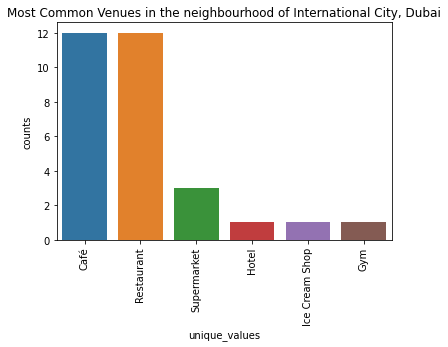

In [165]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat4)

barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of International City, Dubai') # add title to the plot

In [61]:
# one hot encoding
international_onehot = pd.get_dummies(dfint[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
international_onehot['Community'] = 'International City' 

# move neighborhood column to the first column
fixed_columns = [international_onehot.columns[-1]] + list(international_onehot.columns[:-1])
international_onehot = international_onehot[fixed_columns]

international_onehot

,Community,Café,Gym,Hotel,Ice Cream Shop,Restaurant,Supermarket
0,International City,0,0,0,0,1,0
1,International City,0,0,0,0,1,0
2,International City,0,0,0,0,1,0
3,International City,0,0,0,0,1,0
4,International City,0,0,0,0,1,0
5,International City,0,0,0,0,0,1
6,International City,0,0,1,0,0,0
7,International City,0,0,0,1,0,0
8,International City,0,0,0,0,1,0
9,International City,0,0,0,0,1,0


In [76]:
dflowcost

,Median Rent(AED/unit),Latitude,Longitude
Community,,,
Discovery Gardens,32457,25.033867,55.151891
Dubai Silicon Oasis,39525,25.122194,55.385433
IMPZ,30972,25.031797,55.191002
International City,24843,25.166041,55.407730


**v. Dubai Residence Complex**

In [81]:
# Now We will explore Dubai Silicon Oasis
latitude=dflowcost.loc['Dubai Residence Complex','Latitude' ]
longitude=dflowcost.loc['Dubai Residence Complex','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.093545,55.3797483246991&v=20180604&radius=1000&limit=30'

In [82]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [83]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-53478eb5498e36bfc25e8387-0,0,"[{'summary': 'This spot is popular', 'type': '...",53478eb5498e36bfc25e8387,Abidos Hotel Apartments Dubailand,Dubailand Residence Area,Emirates road,25.089309,55.379377,"[{'label': 'display', 'lat': 25.08930876981414...",473,232808,AE,"Nad Al Sheba 1, Dubai",دبي,دبي,الإمارات العربية المتحدة,"[Dubailand Residence Area (Emirates road), دبي...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],84291088
1,e-0-53a3283a498ec3cd5c82de19-1,0,"[{'summary': 'This spot is popular', 'type': '...",53a3283a498ec3cd5c82de19,The Monk,Silicon Oasis SIT Tower,NaN,25.099492,55.374084,"[{'label': 'display', 'lat': 25.09949195379113...",874,NaN,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Silicon Oasis SIT Tower, دبي, الإمارات العربي...","[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",0,[],NaN
2,e-0-4f559e26e4b0b1295cac32ab-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f559e26e4b0b1295cac32ab,Thomsun's,"Sky Court Tower, Dubai Land",Dubai Alain Highway,25.090557,55.385461,"[{'label': 'display', 'lat': 25.09055669956488...",665,NaN,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Sky Court Tower, Dubai Land (Dubai Alain High...","[{'id': '4d954b0ea243a5684a65b473', 'name': 'C...",0,[],NaN
3,e-0-5084055ce4b0d5064be0baf4-3,0,"[{'summary': 'This spot is popular', 'type': '...",5084055ce4b0d5064be0baf4,Pudumadam,Skycourt Towers,NaN,25.091632,55.384711,"[{'label': 'display', 'lat': 25.09163206301742...",543,NaN,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Skycourt Towers, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN
4,e-0-52fbbb09498e20dfc52fe7e8-4,0,"[{'summary': 'This spot is popular', 'type': '...",52fbbb09498e20dfc52fe7e8,Eat & Drink restaurant,Dubailand,NaN,25.097200,55.379800,"[{'label': 'display', 'lat': 25.0972, 'lng': 5...",406,NaN,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Dubailand, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN


In [84]:
print(dataframe.shape[0],"venues are returned by Foursquare")
dataframe['venue.name']

10 venues are returned by Foursquare


0    Abidos Hotel Apartments Dubailand
1                             The Monk
2                            Thomsun's
3                            Pudumadam
4               Eat & Drink restaurant
5                            800 Pizza
6                  Key Pee Supermarket
7                   Madina Supermarket
8                               Vincci
9                 Skycourt Tower B Gym
Name: venue.name, dtype: object

In [85]:
dfdres=getvenues(results,dataframe)
dfdres

,venue.name,Venue,lat,lng,category,distance
0,Abidos Hotel Apartments Dubailand,25.089309,25.089309,55.379377,Hotel,473
1,The Monk,25.099492,25.099492,55.374084,Chinese Restaurant,874
2,Thomsun's,25.090557,25.090557,55.385461,Convenience Store,665
3,Pudumadam,25.091632,25.091632,55.384711,Indian Restaurant,543
4,Eat & Drink restaurant,25.097200,25.097200,55.379800,Diner,406
5,800 Pizza,25.089456,25.089456,55.379503,Pizza Place,455
6,Key Pee Supermarket,25.089271,25.089271,55.379326,Department Store,477
7,Madina Supermarket,25.092450,25.092450,55.385473,Fruit & Vegetable Store,589
8,Vincci,25.091270,25.091270,55.386056,Shoe Store,684
9,Skycourt Tower B Gym,25.091273,25.091273,55.386200,Gym / Fitness Center,697


In [86]:
print("There are ", len(dfdres['category'].unique()),' unique categories')

There are  10  unique categories


In [87]:
dfcat5=dfdres['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat5

,unique_values,counts
0,Department Store,1
1,Diner,1
2,Shoe Store,1
3,Indian Restaurant,1
4,Chinese Restaurant,1
5,Gym / Fitness Center,1
6,Fruit & Vegetable Store,1
7,Hotel,1
8,Pizza Place,1
9,Convenience Store,1


In [90]:
## As the category has different types of restaurants and Gyms, we will regroup the data.
del_duplicate(dfdres)
dfdres

,venue.name,Venue,lat,lng,category,distance,categorytype
0,Abidos Hotel Apartments Dubailand,25.089309,25.089309,55.379377,Hotel,473,Hotel
1,The Monk,25.099492,25.099492,55.374084,Chinese Restaurant,874,Restaurant
2,Thomsun's,25.090557,25.090557,55.385461,Convenience Store,665,Convenience Store
3,Pudumadam,25.091632,25.091632,55.384711,Indian Restaurant,543,Restaurant
4,Eat & Drink restaurant,25.097200,25.097200,55.379800,Diner,406,Restaurant
5,800 Pizza,25.089456,25.089456,55.379503,Pizza Place,455,Restaurant
6,Key Pee Supermarket,25.089271,25.089271,55.379326,Department Store,477,Department Store
7,Madina Supermarket,25.092450,25.092450,55.385473,Fruit & Vegetable Store,589,Fruit & Vegetable Store
8,Vincci,25.091270,25.091270,55.386056,Shoe Store,684,Shoe Store
9,Skycourt Tower B Gym,25.091273,25.091273,55.386200,Gym / Fitness Center,697,Gym


In [162]:
dfcat5=dfdres['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat5

,unique_values,counts
0,Restaurant,4
1,Department Store,1
2,Shoe Store,1
3,Fruit & Vegetable Store,1
4,Hotel,1
5,Gym,1
6,Convenience Store,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of Dubai Residence Complex')

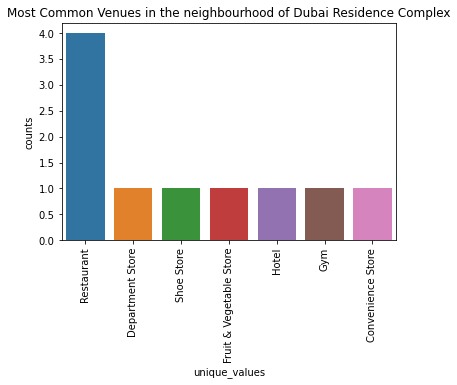

In [163]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat5)

barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of Dubai Residence Complex') # add title to the plot

In [93]:
# one hot encoding
dresidence_onehot = pd.get_dummies(dfdres[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dresidence_onehot['Community'] = 'Dubai Residence Complex' 

# move neighborhood column to the first column
fixed_columns = [dresidence_onehot.columns[-1]] + list(dresidence_onehot.columns[:-1])
dresidence_onehot = dresidence_onehot[fixed_columns]

dresidence_onehot

,Community,Convenience Store,Department Store,Fruit & Vegetable Store,Gym,Hotel,Restaurant,Shoe Store
0,Dubai Residence Complex,0,0,0,0,1,0,0
1,Dubai Residence Complex,0,0,0,0,0,1,0
2,Dubai Residence Complex,1,0,0,0,0,0,0
3,Dubai Residence Complex,0,0,0,0,0,1,0
4,Dubai Residence Complex,0,0,0,0,0,1,0
5,Dubai Residence Complex,0,0,0,0,0,1,0
6,Dubai Residence Complex,0,1,0,0,0,0,0
7,Dubai Residence Complex,0,0,1,0,0,0,0
8,Dubai Residence Complex,0,0,0,0,0,0,1
9,Dubai Residence Complex,0,0,0,1,0,0,0


**vi. Liwan**

In [94]:
# Now We will explore Dubai Silicon Oasis
latitude=dflowcost.loc['Liwan','Latitude' ]
longitude=dflowcost.loc['Liwan','Longitude' ]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=HVWLAZDYXVWC2I5LIIQJ2NTBPEKEF3CAJOUOAE0WVXDQ4CD3&client_secret=KYCQDNK5G2QPFV0OK0SQN5M1SNLZVYCHWZLVVEWNCADHPYSD&ll=25.1101209,55.3676993&v=20180604&radius=1000&limit=30'

In [95]:
results = requests.get(url).json()['response']['groups'][0]['items']

In [96]:
# tranform venues into a dataframe
dataframe = pd.json_normalize(results)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet
0,e-0-554ce3a8498e1f4802f0437d-0,0,"[{'summary': 'This spot is popular', 'type': '...",554ce3a8498e1f4802f0437d,Shakespeare and Co. شكسبير أند كو,Dubai Silicon Oasis,25.114215,55.372102,"[{'label': 'display', 'lat': 25.11421501907901...",636,AE,دبي,دبي,الإمارات العربية المتحدة,"[Dubai Silicon Oasis, دبي, الإمارات العربية ال...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN
1,e-0-561fc522498eef9b2f2751db-1,0,"[{'summary': 'This spot is popular', 'type': '...",561fc522498eef9b2f2751db,Kaffa Beans Specialty Coffee,Dubai Silicon Oasis,25.114296,55.372037,"[{'label': 'display', 'lat': 25.11429639356409...",638,AE,NaN,NaN,الإمارات العربية المتحدة,"[Dubai Silicon Oasis, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN
2,e-0-54f22963498e3a13f3045d9b-2,0,"[{'summary': 'This spot is popular', 'type': '...",54f22963498e3a13f3045d9b,Mirdif City Centre,NaN,25.107990,55.361202,"[{'label': 'display', 'lat': 25.10799013427448...",696,AE,NaN,NaN,الإمارات العربية المتحدة,[الإمارات العربية المتحدة],"[{'id': '52f2ab2ebcbc57f1066b8b39', 'name': 'S...",0,[],NaN
3,e-0-4d179aed4dd12c0f67f8a8e6-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d179aed4dd12c0f67f8a8e6,Dubai Camel Racecourse,Al-Ain Rd,25.116046,55.368163,"[{'label': 'display', 'lat': 25.11604556625032...",661,AE,دبي,دبي,الإمارات العربية المتحدة,"[Al-Ain Rd, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d1f4931735', 'name': 'R...",0,[],NaN
4,e-0-50c4cef4e4b0a6a64ffeca0b-4,0,"[{'summary': 'This spot is popular', 'type': '...",50c4cef4e4b0a6a64ffeca0b,grills & more,Dubai Silicon Oasis Near Green Belt (small),25.110243,55.377247,"[{'label': 'display', 'lat': 25.11024267080324...",962,AE,NaN,NaN,الإمارات العربية المتحدة,"[Dubai Silicon Oasis Near Green Belt (small), ...","[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",0,[],NaN


In [97]:
print(dataframe.shape[0],"venues are returned by Foursquare")
dataframe['venue.name']

11 venues are returned by Foursquare


0                Shakespeare and Co. شكسبير أند كو
1                     Kaffa Beans Specialty Coffee
2                               Mirdif City Centre
3                           Dubai Camel Racecourse
4                                    grills & more
5     Abdullah Omar Cafeteria كافتيريا عبدالله عمر
6                           Abdulla Omar Cafeteria
7                                   Little Bangkok
8                 Green park supermarket ASB tower
9                              Thomson Supermarket
10                                 City Walk Dubai
Name: venue.name, dtype: object

In [98]:
dfliwan=getvenues(results,dataframe)
dfliwan

,venue.name,Venue,lat,lng,category,distance
0,Shakespeare and Co. شكسبير أند كو,25.114215,25.114215,55.372102,Café,636
1,Kaffa Beans Specialty Coffee,25.114296,25.114296,55.372037,Coffee Shop,638
2,Mirdif City Centre,25.107990,25.107990,55.361202,Shoe Repair,696
3,Dubai Camel Racecourse,25.116046,25.116046,55.368163,Racetrack,661
4,grills & more,25.110243,25.110243,55.377247,Asian Restaurant,962
5,Abdullah Omar Cafeteria كافتيريا عبدالله عمر,25.109344,25.109344,55.374965,Cafeteria,737
6,Abdulla Omar Cafeteria,25.109253,25.109253,55.374989,Cafeteria,741
7,Little Bangkok,25.116536,25.116536,55.372217,Thai Restaurant,846
8,Green park supermarket ASB tower,25.110146,25.110146,55.377187,Grocery Store,956
9,Thomson Supermarket,25.118578,25.118578,55.365791,Department Store,960


In [99]:
print("There are ", len(dfliwan['category'].unique()),' unique categories')

There are  10  unique categories


In [100]:
dfcat6=dfliwan['category'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat6

,unique_values,counts
0,Cafeteria,2
1,Asian Restaurant,1
2,Shopping Plaza,1
3,Café,1
4,Department Store,1
5,Shoe Repair,1
6,Racetrack,1
7,Thai Restaurant,1
8,Coffee Shop,1
9,Grocery Store,1


In [101]:
## As the category has different types of restaurants and Gyms, we will regroup the data.
del_duplicate(dfliwan)
dfliwan

,venue.name,Venue,lat,lng,category,distance,categorytype
0,Shakespeare and Co. شكسبير أند كو,25.114215,25.114215,55.372102,Café,636,Café
1,Kaffa Beans Specialty Coffee,25.114296,25.114296,55.372037,Coffee Shop,638,Café
2,Mirdif City Centre,25.107990,25.107990,55.361202,Shoe Repair,696,Shoe Repair
3,Dubai Camel Racecourse,25.116046,25.116046,55.368163,Racetrack,661,Racetrack
4,grills & more,25.110243,25.110243,55.377247,Asian Restaurant,962,Restaurant
5,Abdullah Omar Cafeteria كافتيريا عبدالله عمر,25.109344,25.109344,55.374965,Cafeteria,737,Cafeteria
6,Abdulla Omar Cafeteria,25.109253,25.109253,55.374989,Cafeteria,741,Cafeteria
7,Little Bangkok,25.116536,25.116536,55.372217,Thai Restaurant,846,Restaurant
8,Green park supermarket ASB tower,25.110146,25.110146,55.377187,Grocery Store,956,Grocery Store
9,Thomson Supermarket,25.118578,25.118578,55.365791,Department Store,960,Department Store


In [102]:
dfcat6=dfliwan['categorytype'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dfcat6

,unique_values,counts
0,Café,2
1,Cafeteria,2
2,Restaurant,2
3,Department Store,1
4,Racetrack,1
5,Shopping Plaza,1
6,Shoe Repair,1
7,Grocery Store,1


Text(0.5, 1.0, 'Most Common Venues in the neighbourhood of Liwan, Dubai')

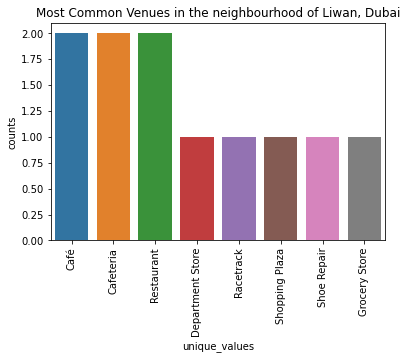

In [103]:
barchart=sns.barplot(x='unique_values', y='counts', data=dfcat6)

barchart.set_xticklabels(barchart.get_xticklabels(),rotation=90) # add to x-label to the plot
barchart.set_title('Most Common Venues in the neighbourhood of Liwan, Dubai') # add title to the plot

In [104]:
# one hot encoding
liwan_onehot = pd.get_dummies(dfliwan[['categorytype']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
liwan_onehot['Community'] = 'Liwan' 

# move neighborhood column to the first column
fixed_columns = [liwan_onehot.columns[-1]] + list(liwan_onehot.columns[:-1])
liwan_onehot = liwan_onehot[fixed_columns]

liwan_onehot

,Community,Cafeteria,Café,Department Store,Grocery Store,Racetrack,Restaurant,Shoe Repair,Shopping Plaza
0,Liwan,0,1,0,0,0,0,0,0
1,Liwan,0,1,0,0,0,0,0,0
2,Liwan,0,0,0,0,0,0,1,0
3,Liwan,0,0,0,0,1,0,0,0
4,Liwan,0,0,0,0,0,1,0,0
5,Liwan,1,0,0,0,0,0,0,0
6,Liwan,1,0,0,0,0,0,0,0
7,Liwan,0,0,0,0,0,1,0,0
8,Liwan,0,0,0,1,0,0,0,0
9,Liwan,0,0,1,0,0,0,0,0


**3.3 Combining and Comparing the Data**

In [105]:
dubai_onehot=pd.concat([gardens_onehot,silicon_onehot,impz_onehot,international_onehot,dresidence_onehot,liwan_onehot], axis=0)

dubai_grouped= dubai_onehot.groupby('Community').mean().reset_index()
dubai_grouped

,Community,Basketball Court,Bus Station,Café,Convenience Store,Gym,Park,Pharmacy,Pool,Restaurant,Shopping Mall,Supermarket,Tennis Court,Currency Exchange,Ice Cream Shop,Nail Salon,Hotel,Department Store,Fruit & Vegetable Store,Shoe Store,Cafeteria,Grocery Store,Racetrack,Shoe Repair,Shopping Plaza
0,Discovery Gardens,0.038462,0.038462,0.115385,0.038462,0.038462,0.038462,0.076923,0.076923,0.346154,0.076923,0.076923,0.038462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dubai Residence Complex,NaN,NaN,NaN,0.100000,0.100000,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,0.1,0.1,NaN,NaN,NaN,NaN,NaN
2,Dubai Silicon Oasis,NaN,NaN,0.227273,0.045455,0.136364,NaN,NaN,NaN,0.454545,NaN,NaN,NaN,0.045455,0.045455,0.045455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IMPZ,NaN,NaN,NaN,0.090909,NaN,NaN,NaN,NaN,0.545455,NaN,NaN,NaN,NaN,0.090909,NaN,0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,International City,NaN,NaN,0.400000,NaN,0.033333,NaN,NaN,NaN,0.400000,NaN,0.100000,NaN,NaN,0.033333,NaN,0.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Liwan,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,0.181818,0.090909,0.090909,0.090909,0.090909


In [106]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [107]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community'] = dubai_grouped['Community']

for ind in np.arange(dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Discovery Gardens,Restaurant,Café,Supermarket,Shopping Mall,Pool,Pharmacy,Tennis Court,Park,Gym,Convenience Store
1,Dubai Residence Complex,Restaurant,Shoe Store,Fruit & Vegetable Store,Department Store,Hotel,Gym,Convenience Store,Basketball Court,Bus Station,Café
2,Dubai Silicon Oasis,Restaurant,Café,Gym,Nail Salon,Ice Cream Shop,Currency Exchange,Convenience Store,Basketball Court,Bus Station,Park
3,IMPZ,Restaurant,Hotel,Ice Cream Shop,Convenience Store,Basketball Court,Bus Station,Café,Gym,Park,Pharmacy
4,International City,Restaurant,Café,Supermarket,Hotel,Ice Cream Shop,Gym,Basketball Court,Bus Station,Convenience Store,Park


**Scatter Plot of venues along with its distance from the Residential Community**

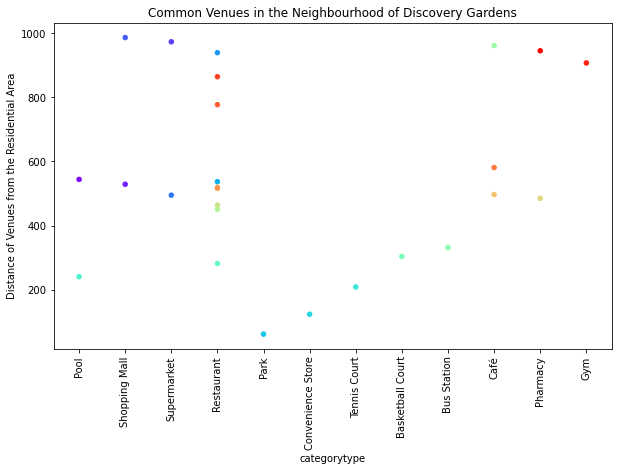

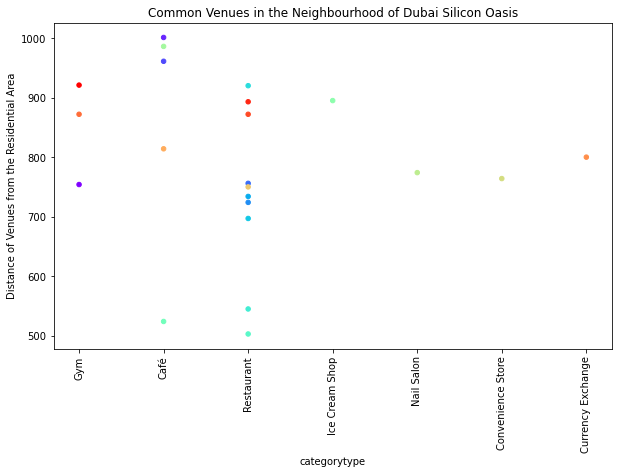

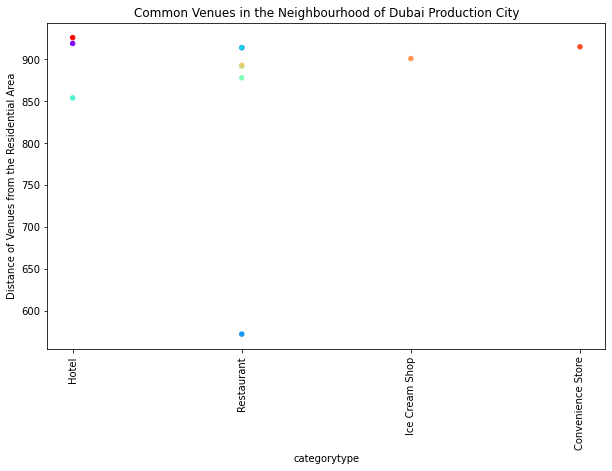

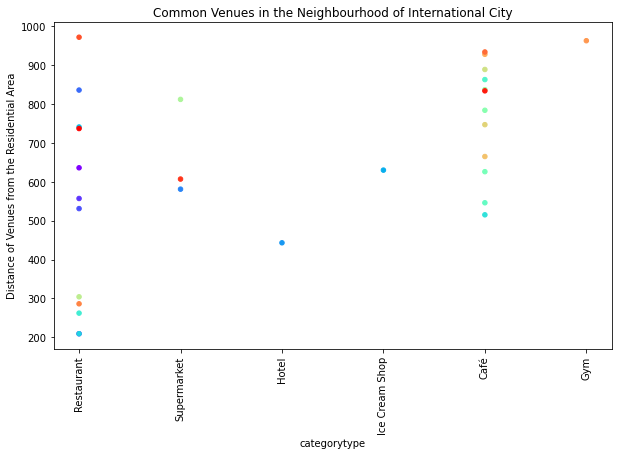

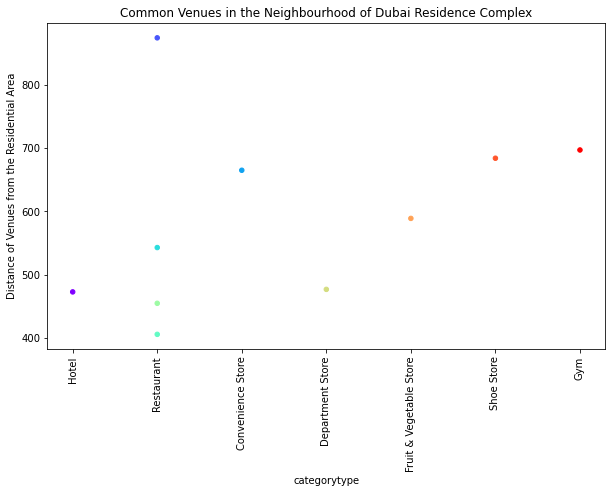

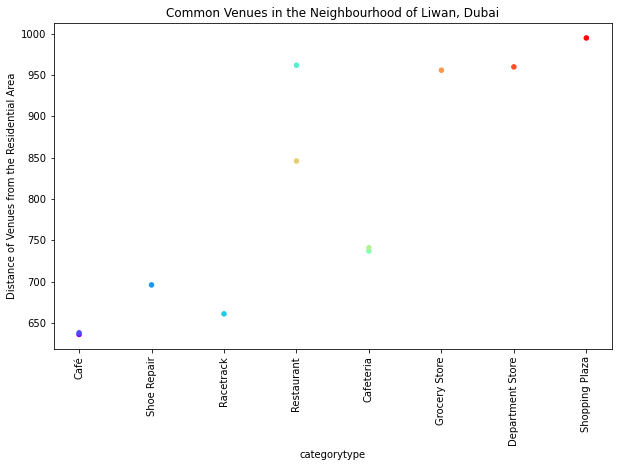

In [109]:
# Subplot 1: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfdiscovery['distance'])))
xval=dfdiscovery['categorytype'].unique()
dfdiscovery.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of Discovery Gardens')

# Subplot 2: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfsilicon['distance'])))
xval=dfsilicon['categorytype'].unique()
dfsilicon.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of Dubai Silicon Oasis')

# Subplot 3: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfimpz['distance'])))
xval=dfimpz['categorytype'].unique()
dfimpz.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of Dubai Production City')

# Subplot 4: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfint['distance'])))
xval=dfint['categorytype'].unique()
dfint.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of International City')

# Subplot 5: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfdres['distance'])))
xval=dfdres['categorytype'].unique()
dfdres.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of Dubai Residence Complex')

# Subplot 6: Scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(dfliwan['distance'])))
xval=dfliwan['categorytype'].unique()
dfliwan.plot(kind='scatter',x='categorytype',y='distance',figsize=(10,6),color=colors)
plt.ylabel('Distance of Venues from the Residential Area')
plt.xticks(xval, rotation=90)
plt.title('Common Venues in the Neighbourhood of Liwan, Dubai')

plt.show()

From the above result, it is clear that out of the 4 sample residential communities, Discovery Gardens, Dubai Silicon Oasis and International City are the best 3 options as these area satisfies our criteria for a lively place as per the available data.

**3.4 Using K-Means Clustering Approach**

In [110]:
from sklearn.preprocessing import StandardScaler

dubai_grouped_clustering = dubai_grouped.drop('Community', 1)
dubai_grouped_clustering

,Basketball Court,Bus Station,Café,Convenience Store,Gym,Park,Pharmacy,Pool,Restaurant,Shopping Mall,Supermarket,Tennis Court,Currency Exchange,Ice Cream Shop,Nail Salon,Hotel,Department Store,Fruit & Vegetable Store,Shoe Store,Cafeteria,Grocery Store,Racetrack,Shoe Repair,Shopping Plaza
0,0.038462,0.038462,0.115385,0.038462,0.038462,0.038462,0.076923,0.076923,0.346154,0.076923,0.076923,0.038462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.100000,0.100000,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,0.1,0.1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.227273,0.045455,0.136364,NaN,NaN,NaN,0.454545,NaN,NaN,NaN,0.045455,0.045455,0.045455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.090909,NaN,NaN,NaN,NaN,0.545455,NaN,NaN,NaN,NaN,0.090909,NaN,0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.400000,NaN,0.033333,NaN,NaN,NaN,0.400000,NaN,0.100000,NaN,NaN,0.033333,NaN,0.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,0.181818,0.090909,0.090909,0.090909,0.090909


In [111]:
neighborhoods_venues_sorted.set_index('Community',inplace=True)
neighborhoods_venues_sorted

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Community,,,,,,,,,,
Discovery Gardens,Restaurant,Café,Supermarket,Shopping Mall,Pool,Pharmacy,Tennis Court,Park,Gym,Convenience Store
Dubai Residence Complex,Restaurant,Shoe Store,Fruit & Vegetable Store,Department Store,Hotel,Gym,Convenience Store,Basketball Court,Bus Station,Café
Dubai Silicon Oasis,Restaurant,Café,Gym,Nail Salon,Ice Cream Shop,Currency Exchange,Convenience Store,Basketball Court,Bus Station,Park
IMPZ,Restaurant,Hotel,Ice Cream Shop,Convenience Store,Basketball Court,Bus Station,Café,Gym,Park,Pharmacy
International City,Restaurant,Café,Supermarket,Hotel,Ice Cream Shop,Gym,Basketball Court,Bus Station,Convenience Store,Park
Liwan,Cafeteria,Restaurant,Café,Shopping Plaza,Shoe Repair,Racetrack,Grocery Store,Department Store,Basketball Court,Bus Station


In [112]:
dubai_grouped_clustering=dubai_grouped_clustering.fillna(0)
dubai_grouped_clustering

,Basketball Court,Bus Station,Café,Convenience Store,Gym,Park,Pharmacy,Pool,Restaurant,Shopping Mall,Supermarket,Tennis Court,Currency Exchange,Ice Cream Shop,Nail Salon,Hotel,Department Store,Fruit & Vegetable Store,Shoe Store,Cafeteria,Grocery Store,Racetrack,Shoe Repair,Shopping Plaza
0,0.038462,0.038462,0.115385,0.038462,0.038462,0.038462,0.076923,0.076923,0.346154,0.076923,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.1,0.1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.227273,0.045455,0.136364,0.000000,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.545455,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.272727,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.400000,0.000000,0.033333,0.000000,0.000000,0.000000,0.400000,0.000000,0.100000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.0,0.181818,0.090909,0.090909,0.090909,0.090909


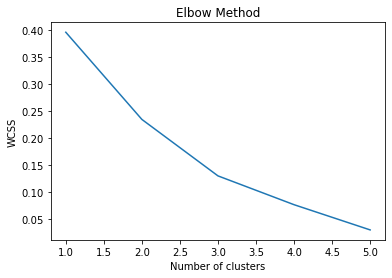

In [113]:
wcss=[]
X = dubai_grouped_clustering.astype(float)
X = np.nan_to_num(X)
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

When we analyse the K-means with elbow method as shown above, the optimum degree is 3. So we will set the number of clusters as 3.

In [114]:

cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dubai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1, 0, 2], dtype=int32)

In [160]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge dubai_grouped with dubai_data to add latitude/longitude for each neighborhood
dubai_merged = dflowcost
dubai_merged = pd.concat([dubai_merged,neighborhoods_venues_sorted], axis=1 )  #dubai_merged.join(neighborhoods_venues_sorted.set_index('Community',inplace=True), on='Community')

dubai_merged

,Median Rent(AED/unit),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Community,,,,,,,,,,,,,,
Discovery Gardens,32457,25.033867,55.151891,0,Restaurant,Café,Supermarket,Shopping Mall,Pool,Pharmacy,Tennis Court,Park,Gym,Convenience Store
Dubai Residence Complex,31853,25.093545,55.379748,1,Restaurant,Shoe Store,Fruit & Vegetable Store,Department Store,Hotel,Gym,Convenience Store,Basketball Court,Bus Station,Café
Dubai Silicon Oasis,39525,25.122194,55.385433,0,Restaurant,Café,Gym,Nail Salon,Ice Cream Shop,Currency Exchange,Convenience Store,Basketball Court,Bus Station,Park
IMPZ,30972,25.031797,55.191002,1,Restaurant,Hotel,Ice Cream Shop,Convenience Store,Basketball Court,Bus Station,Café,Gym,Park,Pharmacy
International City,24843,25.166041,55.407730,0,Restaurant,Café,Supermarket,Hotel,Ice Cream Shop,Gym,Basketball Court,Bus Station,Convenience Store,Park
Liwan,33035,25.110121,55.367699,2,Cafeteria,Restaurant,Café,Shopping Plaza,Shoe Repair,Racetrack,Grocery Store,Department Store,Basketball Court,Bus Station


## 4. Result

Finally, Clustered Map of Dubai with low cost residential communities marked along with a popup contains the details of each community is shown below.

Label contains the following information:

•	Name of the Community

•	Cluster Names as per the cluster label.

    o	Cluster 0: Multiple venues around (marked in red)
    o	Cluster 1: Medium venues around (marked in blue)
    o	Cluster 2: Minimum venues around (marked in yellow)
    
•	Annual Median Housing Rent (AED/unit)

In [161]:
## We will show markers in the list areas of dubai
latitude=25.2048
longitude= 55.2708

Dubai_map = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Terrain')

##Cluster Labels

# instantiate a feature group for the incidents in the dataframe
area = folium.map.FeatureGroup()
label=[]

# loop through the community areas and add each to the area feature group
for lat, lng, poi, cluster,price in zip(dubai_merged.Latitude, dubai_merged.Longitude,dubai_merged.index, dubai_merged['Cluster Labels'], dubai_merged['Median Rent(AED/unit)']):
    
    if (cluster==0) :
        label.append(str(poi) + '/ Multiple Venues around/ AED' + str(price) )
        area.add_child(        
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                fill=True,
                color='red',
                fill_color='blue',
                fill_opacity=0.6
                )
        )
    elif (cluster==1):
        label.append(str(poi) + '/ Medium Venues around/ AED' + str(price))
        area.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                fill=True,
                color='blue',
                fill_color='yellow',
                fill_opacity=0.6
            )
        )
    else :
        label.append(str(poi) + '/ Minimum Venues around/ AED' + str(price))
        area.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                fill=True,
                color='yellow',
                fill_color='red',
                fill_opacity=0.6
            )
        )

# add pop-up text to each marker on the map
latitudes = list(dubai_merged.Latitude)
longitudes = list(dubai_merged.Longitude)
#label = list(dubai_merged.index)

for lat, lng, labels in zip(latitudes, longitudes, label):
    folium.Marker([lat, lng], popup=labels).add_to(Dubai_map)    
    
# add area to map
Dubai_map.add_child(area)

## 5. Conclusion

•	As per the criteria of our search, we have identified six low cost residential communities in Dubai.

•	Discovery Gardens, Silicon Oasis and International City has been identified having economical residences with multiple venues around (Cluster 0) in which International City is the least cost residential community.

•	Dubai Residence Complex and IMPZ (Dubai Production City) has been identified having the economical residences with medium number of venues around (Cluster 1).

•	Even though Liwan residence is economical, there are very few venues identified around this community.


## Thank you!!!